# Systemy uczące się: Modele generatywne i dyskryminatywne

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

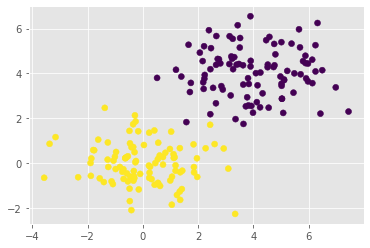

In [2]:
from helpers import generate1, generate2, generate3

X, y = generate1()
plt.scatter(X[:,0], X[:,1], c = y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [3]:
from  scipy.stats import norm

# (X, mean, std)
norm.pdf(5, 0, 1) #gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1) #logarytm gęstości prawd. dla 5 z rozkładu standardowego

-13.418938533204672

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [4]:

class GaussianNaiveBayes():
    def __init__(self):
        self.means = {} 
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        self.stds = {} 
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None 
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)
        self.classes = []
        # Pomocnicza tablica uniklanych klas
        
    def fit(self, X, y):
        # - proces uczenia czyli uzupełniania struktur zainicjaliowanych w init() odpowiednimi wartościami
        # X jest macierzą gdzie każdy wiersz zawiera kolejną obserwację (typ np.array) 
        # y jest wektorem wartości indeksu klasy (0 lub 1). Jego wartości odpowiadają kolejnym wierszom X
        self.classes = np.unique(y)
        self.means = {y_i: np.mean(X[y == y_i, :], axis=0) for y_i in self.classes}
        self.stds = {y_i: np.std(X[y == y_i, :], axis=0) for y_i in self.classes}
        self.class_log_prob = np.log([np.mean(y == y_i) for y_i in self.classes])
        # średnia po tablicy boolean da stosunek ilości True do ilości True+False
        
    def predict_proba(self, X):
        # - predykcja - zwrócenie prawdopodobieństwa dla każdej klasy i każdej obserwacji
        rows, cols = X.shape
        pred_probs = []
        for row in range(rows):
            p = []
            for c_i, cls in enumerate(self.classes):
                logs = [norm.logpdf(X[row][col], self.means[cls][col], self.stds[cls][col]) for col in range(cols)]
                p.append( sum(logs) + self.class_log_prob[c_i] )
            pred_probs.append(p)
        # Funkcja powinna zwrócić macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze 
        # zawierają prawdopodobieństwa P(c|x) przynależności dla klas dla kolejnych obserwacji w macierzy X
        return np.exp(pred_probs)/np.sum(np.exp(pred_probs), axis=1, keepdims=True)
    
    def predict(self, X):
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)


Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [5]:
gnb = GaussianNaiveBayes()
gnb.fit(X,y)
# print(gnb.means)
# print(gnb.stds)
# print(gnb.class_log_prob)
# print(gnb.predict_proba(X))
# Trafność na zbiorze uczącym
np.mean(gnb.predict(X) == y)


0.99

Narysowanie nauczonego klasyfikatora

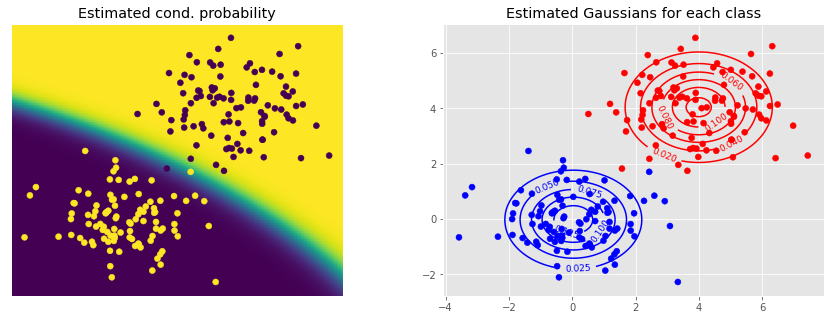

In [6]:
from helpers import plotGaussianBayes
plotGaussianBayes(X, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [7]:
for i, gen in enumerate([generate1, generate2, generate3]):
    gnb = GaussianNaiveBayes()
    X, y = gen()
    gnb.fit(X,y)
    X_test, y_test = gen(1000)
    mean = np.mean(gnb.predict(X_test) == y_test)
    print(f"generate{i}: {mean}")

generate0: 0.991
generate1: 0.998
generate2: 0.8435


In [8]:
# Tu będą testy sprawdzarki

**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 
 
 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.

YOUR ANSWER HERE
4. Przykłady z jednej klasy (`+`) mogą przenikać do obszaru, gdzie występuje bardzo duża ilość przykładów klasy drugiej (`o`). Jako że naiwny klasyfikator Bayesowski operuje na prawdopodobieństwach, może w takiej sytuacji błędnie klasyfikować `+` jako klasę `o`, mimo że na przykład prawdopodobieństwo wystąpienia przykładu z klasy `+` wynosiło zaledwie 1%.
5. Mimo przepisania tych wartości do klasyfikatora, nie zawsze byłoby możliwe uzyskanie 100% trafności. Taki klasyfikator Bayesowski byłby klasyfikatorem optymalnym, jednak mógłby nadal źle klasyfikować niektóre nietypowe przypadki przynależności do klas. Klasyfikator o 100% trafności byłby natomiast klasyfikatorem doskonałym, jednak osiągnięcie takiej skuteczności nie jest możliwe.

# Zadanie 2
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [  'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None) # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [10]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [11]:
newsgroups_train.target[0:3]

array([0, 1, 0])

i do "zbinaryzowanego" tekstu

In [12]:
vectors[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Wytrenuj klasyfikator Naiwnego Bayesa z rozmywaniem estymat (patrz pakiet `sklearn`) i sprawdż jego trafność na zbiorze uczącym i testowym.
UWAGA: wytrenowany klasyfikator powinien być przypisany do zmiennej `nb` na której `nb.predict()` zostaną wykonane testy

In [13]:
# YOUR CODE HERE
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(vectors, newsgroups_train.target)
nb.predict(vectors_test)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [14]:
# Tu będą testy

**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?
 
 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

YOUR ANSWER HERE

1. Z reguły dla każdej klasy/kategorii istnieje jakiś zbiór słów (cech), które są dla niej unikalne, albo pojawiają się znacznie częściej, niż w innych kategoriach. Wysokie prawdopodobieństwo wystąpienia słów związanych z kosmetykami lub ubraniami może dość pewnie prowadzić do sklasyfikowania tekstu jako związanego z modą, a nie z motoryzacją.   


3. Raczej tak. Można by spróbować usuwać z tekstów tzw. "stop words" czy zamieniać formy osobowe niektórych słów na bezosobowe, a czasowniki na bezokoliczniki.


6. Naiwny Bayes jest szybki i sprawdza się świetnie między innymi dla cech będących zmiennymi kategorialnymi, z którymi drzewa decyzyjne nie radzą sobie aż tak dobrze. Operując na tekstach o bardzo dużej liczbie unikalnych wyrazów, bardzo ciężko przeprowadzałoby się proces wybierania najlepszego podziału dla drzewa decyzyjnego, ponieważ każdy taki wyraz to oddzielna cecha do rozpatrzenia przez drzewo. Niektóre wyrazy mogą także nie pojawiać się w jednych tekstach, a być obecne w drugich, co jest kolejnym problemem (trzeba szykować reguły zastępcze lub schodzić dwoma rozgałęźieniami drzewa). 